In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc=QuantumCircuit(2)

#This calculates what the state vector of our qubits would be 
#after passing through the circuit 'qc'

ket=Statevector(qc)

#The code below wirtes down the state vector
#Since it's the last line inthe cell, the cell will display it as output

ket.draw(output='latex')

<IPython.core.display.Latex object>

In [16]:
qc.cx(1,0)

ket=Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

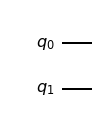

In [18]:
qc=QuantumCircuit(2)
qc.draw(output='mpl')

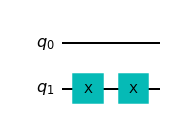

In [20]:
qc.x(1)

ket=Statevector(qc)
qc.draw(output='mpl')

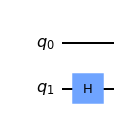

In [21]:
#Let's create a fresh quantum circuit
qc=QuantumCircuit(2)

qc.h(1)

ket=Statevector(qc)
qc.draw(output='mpl')

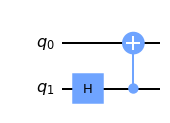

In [22]:
qc.cx(1,0)

ket=Statevector(qc)
qc.draw(output='mpl')

In [23]:
ket.draw(output='latex')

<IPython.core.display.Latex object>

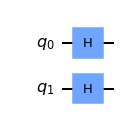

In [24]:
qc=QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket=Statevector(qc)
qc.draw(output='mpl')

In [26]:
ket.draw(output='latex')

<IPython.core.display.Latex object>

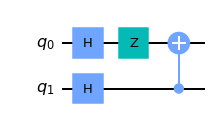

In [47]:
qc=QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.z(0)
qc.cx(1,0)

ket=Statevector(qc)
qc.draw(output='mpl')

In [48]:
ket.draw(output='latex')

<IPython.core.display.Latex object>

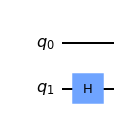

In [45]:
qc=QuantumCircuit(2)
qc.h(1)
#qc.z(1)

ket=Statevector(qc) # Statevector 명령어 사용시 순서 주의할 것.
qc.draw(output='mpl')

In [46]:
ket.draw(output='latex')

<IPython.core.display.Latex object>

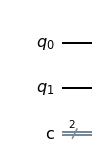

In [51]:
# The message

MESSAGE='00'

#Alice encodes the message
qc_alice=QuantumCircuit(2,2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

qc_alice.draw(output='mpl')

In [52]:
from qiskit import Aer
backend=Aer.get_backend('aer_simulator')

#Bob measures
qc_bob=QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

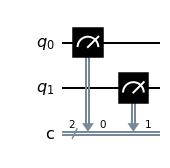

In [53]:
qc_bob.draw(output='mpl')

In [54]:
MESSAGE='00'

qc_alice=QuantumCircuit(2,2)

#Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

#then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket=Statevector(qc_alice)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [55]:
type(MESSAGE)

str

In [68]:
qc_bob = QuantumCircuit(2,2)

#BOb disentagles
qc_bob.cx(1,0)
ket=Statevector(qc_bob)
ket.draw(output='latex')

qc_bob.h(1)

#Then measures
qc_bob.measure([0,1],[0,1])

#qc_bob.draw(output='mpl')

0


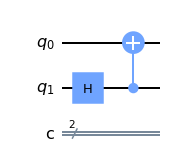

In [63]:
MESSAGE='00'

qc_alice=QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

print(MESSAGE[-1])

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

ket = Statevector(qc_alice)
qc_alice.draw(output='mpl')

In [62]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

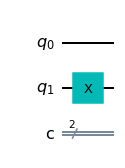

In [64]:
MESSAGE = '01'

qc_alice=QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

qc_alice.draw(output='mpl')

In [66]:
complete_qc=qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

NameError: name 'qc_charlie' is not defined

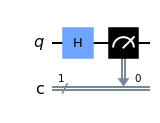

In [71]:
meas_x=QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw(output='mpl')

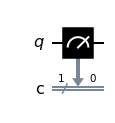

In [73]:
meas_z=QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw(output='mpl')

In [74]:
qc=QuantumCircuit(1,1)

qc.draw

z_meas_counts=backend.run(qc.compose(meas_z)).result().get_counts()
print('Results from z measurement:', z_meas_counts)

Results from z measurement: {'0': 1024}


In [75]:
x_meas_counts=backend.run(qc.compose(meas_x)).result().get_counts()
print('Results from x measurement:',x_meas_counts)

Results from x measurement: {'1': 520, '0': 504}


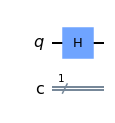

In [76]:
qc=QuantumCircuit(1,1)
qc.h(0)

qc.draw(output='mpl')

In [77]:
for basis,circ in [('z',meas_z),('x',meas_x)]:
    print('Results from'+basis+'measurement:',backend.run(qc.compose(circ)).result().get_counts())

Results fromzmeasurement: {'0': 532, '1': 492}
Results fromxmeasurement: {'0': 1024}


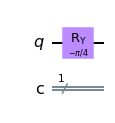

In [79]:
import math
from math import pi

qc=QuantumCircuit(1,1)
qc.ry(-pi/4,0)

qc.draw(output='mpl')

In [80]:
for basis,circ in [('z',meas_z),('x',meas_x)]:
    print('Results from'+basis+'measurement:',backend.run(qc.compose(circ)).result().get_counts())

Results fromzmeasurement: {'0': 895, '1': 129}
Results fromxmeasurement: {'1': 862, '0': 162}


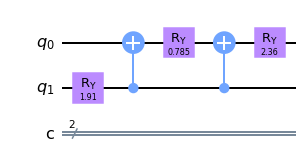

In [82]:
qc_charlie=QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw(output='mpl')

In [83]:
meas_zz=QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])

Results for z measurements: 


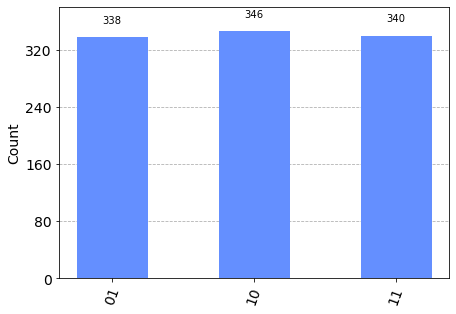

In [85]:
from qiskit.visualization import plot_histogram

print('Results for z measurements: ')
counts=backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

Results for a z and an x measurement:


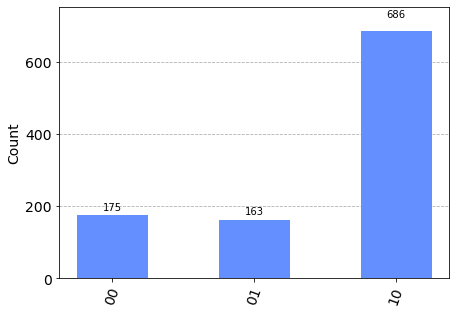

In [86]:
meas_zx=QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])

print('Results for a z and an x measurement:')
counts=backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)